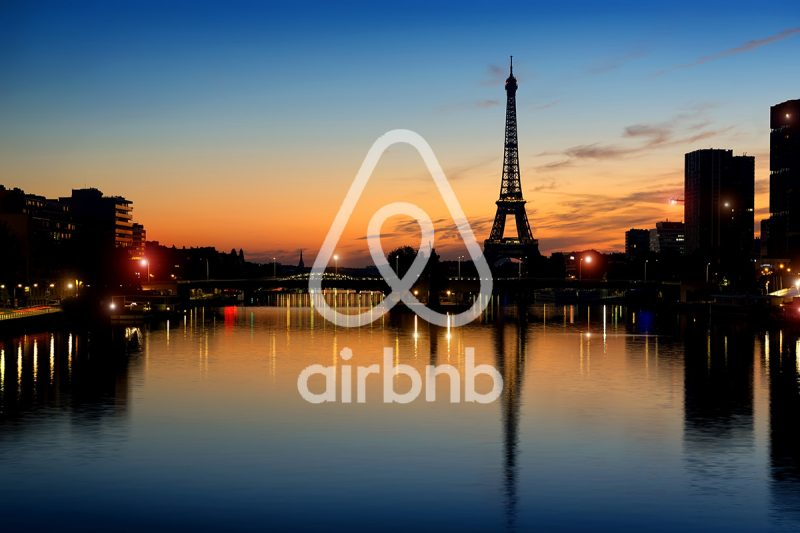

Fundado em 2008, o Airbnb é um serviço online de reserva de casas e apartamentos. A empresa atua como um intermediário entre os hóspedes e os anfitriões que oferecem desde um quarto individual até um imóvel completo.

Por ser uma empresa Open Data, o Airbnb disponibiliza este dataset e outros em seu [website](http://insideairbnb.com/get-the-data.html).

Neste projeto, será feita uma análise descritiva e exploratória dos dados contidos no dataset da cidade de Paris, fornecido no [website](http://insideairbnb.com/get-the-data.html) da empresa. O dataset disponibilizado é de 09 de outubro de 2021.

#### Dicionário de variáveis

 - ``id`` - identificador único utilizado para identificar o imóvel
 - ``name`` - nome do imóvel
 - ``host_id`` - identificador único do proprietário (anfitrião) do imóvel
 - ``host_name`` - nome do proprietário (anfitrião) do imóvel
 - ``neighbourhood_group`` - esta coluna do dataset não apresenta nenhum valor válido
 - ``neighbourhood`` -  nome do bairro
 - ``latitude`` - coordenada da latitude do imóvel, obtida a partir do WGS84 (World Geodetic System - Sistema de geodésico global)
 - ``longitude`` - coordenada da longitude do imóvel, obtida a partir do WGS84 (World Geodetic System - Sistema geodésico global)
 - ``room_type`` - tipo de acomodação oferecido
 - ``price`` - valor da diária na moeda local
 - ``minimum_nights`` - número mínimo de noites para reservar a acomodação 
 - ``number_of_reviews`` - número de avaliações que o imóvel possui
 - ``last_review`` - a data da última avaliação recebida pelo imóvel
 - ``reviews_per_month`` - número de avaliações recebidas por mês
 - ``calculated_host_listings_count`` - quantidade de acomodações do mesmo anfitrião
 - ``availability_365`` - número de dias de disponibilidade denrto de 365 dias
 - ``number_of_reviews_ltm`` -  número de avaliações recebidas nos últimos 12 meses
 - ``license`` - número da licença


### 1. Carregamento das bibliotecas e dos dados

In [1]:
# Realizando a importação das bibliotecas utilizadas

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
%matplotlib inline


In [2]:
# Realizando o carregamento do dataset

df=pd.read_csv('listings.csv', sep=',')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85207,2.35871,Entire home/apt,100,2,263,2020-08-08,2.68,1,55,35,7510402838018
1,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,105,10,282,2021-09-29,2.28,1,233,13,7510400829623
2,7964,Large & sunny flat with balcony !,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,130,6,6,2015-09-14,0.07,1,293,0,7510903576564
3,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,Bernadette,NaN,Louvre,48.85899,2.34735,Entire home/apt,75,180,0,NaN,NaN,1,58,0,"Available with a mobility lease only (""bail mo..."
4,9952,Paris petit coin douillet,33534,Elisabeth,NaN,Popincourt,48.86227,2.37134,Entire home/apt,80,4,32,2021-06-23,0.51,1,212,7,7511101582862


Uma vez que algumas colunas possuem muitos valores nulos, e que outras não são interessantes para este projeto, o dataset será limitado apenas às colunas de interesse, que são as colunas com as variáveis ``neighbourhood``, ``latitude``, ``longitude``, ``room_type``, ``price`` e ``minimum_nights``.

In [3]:
# Limitando o dataset aos dados de interesse

dados = df[['neighbourhood','latitude','longitude','room_type','price','minimum_nights']]
dados.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights
0,Hôtel-de-Ville,48.85207,2.35871,Entire home/apt,100,2
1,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,105,10
2,Opéra,48.87417,2.34245,Entire home/apt,130,6
3,Louvre,48.85899,2.34735,Entire home/apt,75,180
4,Popincourt,48.86227,2.37134,Entire home/apt,80,4


### 2. Resumo dos dados

In [4]:
# Análise descritiva dos dados

dados.describe()

,latitude,longitude,price,minimum_nights
count,49634.000000,49634.000000,49634.000000,49634.000000
mean,48.863998,2.344889,130.203207,111.961256
std,0.018146,0.033118,229.383172,169.898643
min,48.812220,2.221440,0.000000,1.000000
25%,48.850880,2.324130,60.000000,2.000000
50%,48.865330,2.347985,90.000000,4.000000
75%,48.878450,2.369280,140.000000,365.000000
max,48.905690,2.467120,11600.000000,9999.000000


In [5]:
# Verificação dos tipos das variáveis

dados.dtypes

neighbourhood      object
latitude          float64
longitude         float64
room_type          object
price               int64
minimum_nights      int64
dtype: object

In [6]:
# Verificação de possíveis valores nulos nos dados de interesse

dados.isnull().sum()

neighbourhood     0
latitude          0
longitude         0
room_type         0
price             0
minimum_nights    0
dtype: int64

A tabela acima indica que não existem valores nulos no dataset analisado.

In [7]:
# Verificação dos valores distintos da variável neighbourhood

print(dados.neighbourhood.unique())
print(f'\nForam encontrados {dados.neighbourhood.unique().size} bairros no dataset')

['Hôtel-de-Ville' 'Opéra' 'Louvre' 'Popincourt' 'Buttes-Montmartre'
 'Batignolles-Monceau' 'Entrepôt' 'Gobelins' 'Luxembourg'
 'Buttes-Chaumont' 'Panthéon' 'Palais-Bourbon' 'Reuilly' 'Bourse' 'Élysée'
 'Vaugirard' 'Ménilmontant' 'Observatoire' 'Passy' 'Temple']

Foram encontrados 20 bairros no dataset


In [8]:
# Verificação dos valores distintos da variável room_type

print(dados.room_type.unique())
print(f'\nForam encontrados {dados.room_type.unique().size} tipos de acomodação')

['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']

Foram encontrados 4 tipos de acomodação


### 3. Análise de cada variável

#### Variável analisada: Neighbourhood

In [9]:
# Tabela com as frequências absoluta e relativa da variável neighbourhood

nbhd_abs = dados.groupby('neighbourhood')['neighbourhood'].count().sort_values(ascending=False)
nbhd_rel = (dados.groupby('neighbourhood')['neighbourhood'].count()/dados.shape[0])
nbhdtable = pd.DataFrame((nbhd_abs,nbhd_rel*100), index=['freq. abs','freq. rel (%)']).transpose().round(2)

print("\nDisponibilidade de imóveis para alugar por bairro:")
nbhdtable


Disponibilidade de imóveis para alugar por bairro:


,freq. abs,freq. rel (%)
neighbourhood,,
Buttes-Montmartre,5309.0,10.70
Popincourt,4576.0,9.22
Vaugirard,3696.0,7.45
Entrepôt,3562.0,7.18
Batignolles-Monceau,3189.0,6.43
Buttes-Chaumont,2730.0,5.50
Ménilmontant,2715.0,5.47
Opéra,2582.0,5.20
Passy,2467.0,4.97


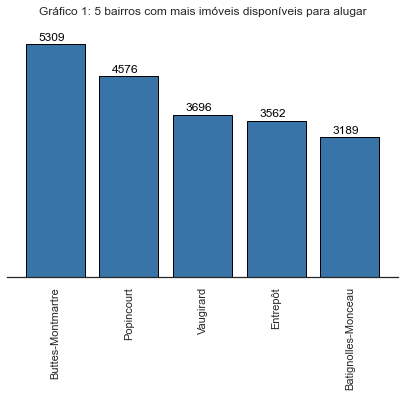

In [40]:
# Gráfico dos 5 bairros com maior disponibilidade de imóveis para alugar

plt.figure(figsize=(7,4.5))

ax = nbhd_abs.head(5).plot(kind='bar',width=0.8, color='#3874a7',edgecolor='black',title='Gráfico 1: 5 bairros com mais imóveis disponíveis para alugar\n')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+40),
                    ha='center', va='bottom',
                    color= 'black')

plt.xlabel('')
plt.xticks(rotation=90)
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False);

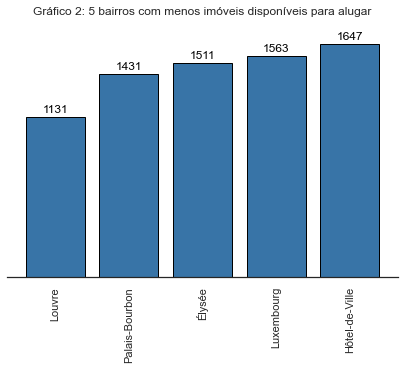

In [75]:
# Gráfico dos 5 bairros com menor disponibilidade de imóveis para alugar

plt.figure(figsize=(7,4.5))

ax = nbhd_abs.tail(5).sort_values(ascending=True).plot(kind='bar',width=0.8, color='#3874a7',edgecolor='black',title='Gráfico 2: 5 bairros com menos imóveis disponíveis para alugar\n')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+20),
                    ha='center', va='bottom',
                    color= 'black')

plt.xlabel('')
plt.xticks(rotation=90)
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False);

É possível notar que o Airbnb possui imóveis para locação em 20 bairros diferentes de Paris. 

Pelo gráfico 1, é possível notar que os três bairros com mais imóveis disponíveis para locação são:
 - 1º Buttes-Montmartre - 5309 imóveis (10.70%)
 - 2º Popincourt - 4576 imóveis (9.22%)
 - 3º Vaugirard - 3696 imóveis (7.45%)

Pela gráfico 2, é posssível notar que os três bairros com menos imóveis disponíveis para locação são:
 - 1º Louvre - 1131 imóveis (2.28%)
 - 2º Palais-Bourbon - 1431 imóveis (2.88%)
 - 3º Élisée - 1511 imóveis (3.04%) 




#### Variável analisada: Room_type

In [12]:
# Tabela com as frequências absolutas e relativas de cada tipo de acomodação da variável neighbourhood

rt_abs = dados.groupby('room_type')['room_type'].count().sort_values(ascending=False)
rt_rel = (dados.groupby('room_type')['room_type'].count()/dados.shape[0])
rttable = pd.DataFrame((rt_abs,rt_rel*100), index=['freq. abs','freq. rel (%)']).transpose().round(2)

rttable

,freq. abs,freq. rel (%)
room_type,,
Entire home/apt,40972.0,82.55
Private room,7141.0,14.39
Hotel room,1188.0,2.39
Shared room,333.0,0.67


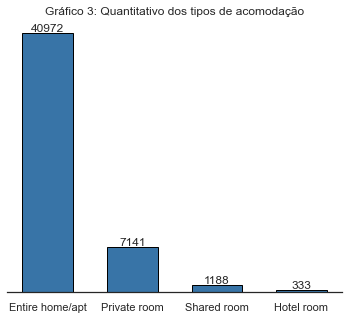

In [49]:
#Gráfico com o quantitativo dos tipos de acomodação, com a quantidade sobre as barras
x = dados['room_type'].unique()
y = dados['room_type'].value_counts()
fig,ax = plt.subplots(figsize=(6,5))
bars = ax.bar(x, y, 0.6, color='#3874a7', edgecolor='black')
plt.title('Gráfico 3: Quantitativo dos tipos de acomodação')

for bar in bars:
    height = bar.get_height()
    label_x_pos = bar.get_x() + bar.get_width() / 2
    ax.text(label_x_pos, height, s=f'{height}', ha='center', va='bottom')
    
plt.xlabel('')
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False);


É possível notar que o tipo de acomodação com maior disponibilidade é o de casa/apartamento inteiro (``entire home/apt``),com 82.55% dos imóveis disponíveis. O tipo quarto privado (``private room``) aparece em segundo, com 14.39%. Os tipos quarto de hotel (``hotel room``) e quarto compartilhado (``shared room``) aparecem por último, com 2.39% e 0.67, respectivamente.

#### Variável analisada: Price

Valores apresentados em Euro (€)

In [14]:
# Criando um intervalo de classes

dados['price_group']=pd.cut(dados['price'],bins=50)

<ipython-input-14-2dc3d5e9e168>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['price_group']=pd.cut(dados['price'],bins=50)


In [15]:
# Tabela com as frequências absoluta e relativa da variável price

p_group_abs = dados.groupby('price_group')['price_group'].count().sort_values(ascending=False)
p_group_rel = (dados.groupby('price_group')['price_group'].count()/dados.shape[0])
ptable = pd.DataFrame((p_group_abs,p_group_rel*100), index=['freq. abs','freq. rel (%)']).transpose().round(2)

print("\nDistribuição dos preços de reserva:")
ptable


Distribuição dos preços de reserva:


,freq. abs,freq. rel (%)
price_group,,
"(-11.6, 232.0]",44543.0,89.74
"(232.0, 464.0]",3851.0,7.76
"(464.0, 696.0]",766.0,1.54
"(696.0, 928.0]",211.0,0.43
"(928.0, 1160.0]",124.0,0.25
"(1160.0, 1392.0]",45.0,0.09
"(1392.0, 1624.0]",23.0,0.05
"(1624.0, 1856.0]",13.0,0.03
"(1856.0, 2088.0]",13.0,0.03


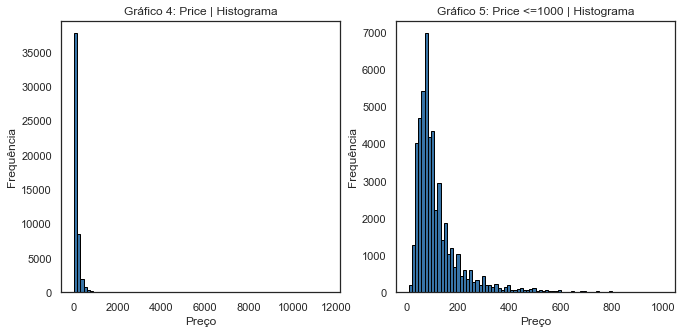

In [54]:
# Histograma da variável Price

plt.figure(figsize=(11,5))

# Histograma de todos os preços
plt.subplot(121)
dados['price'].plot(kind='hist',color='#3874a7',edgecolor='black', bins=80, title='Gráfico 4: Price | Histograma')
plt.xlabel('Preço')
plt.ylabel('Frequência')

# Histograma dos preços menores que 1000

plt.subplot(122)
dados['price'][(df.price > 0) & (df.price<1000)].plot(kind ='hist', color='#3874a7', edgecolor='black', bins=80, title='Gráfico 5: Price <=1000 | Histograma')
plt.xlabel('Preço')
plt.ylabel('Frequência');

In [17]:
# Medidas estatísticas para a variável Price

dados.price.describe().round(2)

count    49634.00
mean       130.20
std        229.38
min          0.00
25%         60.00
50%         90.00
75%        140.00
max      11600.00
Name: price, dtype: float64

In [18]:
# Medidas estatísticas: 

# Moda
print(f'Moda: {dados.price.mode()[0]}')

#Variância
print(f'Variância: {dados.price.var():.2f}')

# Percentil 99%
print(f'Percentil 99%: {np.percentile(dados.price, 99).round(2)}')

Moda: 60
Variância: 52616.64
Percentil 99%: 683.67


A partir da tabela, é possível observar que 89.74% (44543) dos imóveis disponíveis para locação possuem um preço menor que 232 euros. Nota-se ainda que 7.76% (3851) dos imóveis apresentam um valor de reserva entre 232 e 464 libras. Estas duas faixa de valores englobam, portanto, 97.5% de todas as acomodações disponíveis para aluguel.  

#### Variável Analisada: Minimum_nights

In [19]:
# Criando um intervalo de classes

dados['mnights_group']=pd.cut(dados['minimum_nights'], bins=50)

<ipython-input-19-bf4af7575103>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['mnights_group']=pd.cut(dados['minimum_nights'], bins=50)


In [20]:
# Tabela com as frequências absoluta e relativa da variável minimum_nights

mn_group_abs = dados.groupby('mnights_group')['mnights_group'].count().sort_values(ascending=False)
mn_group_rel = (dados.groupby('mnights_group')['mnights_group'].count()/dados.shape[0])
mntable = pd.DataFrame((mn_group_abs,mn_group_rel*100), index=['freq. abs','freq. rel (%)']).transpose().round(2)

print("\nDistribuição do número mínimo de noites para realizar uma reserva:")
mntable


Distribuição do número mínimo de noites para realizar uma reserva:


,freq. abs,freq. rel (%)
mnights_group,,
"(-8.998, 200.96]",35090.0,70.70
"(200.96, 400.92]",14528.0,29.27
"(400.92, 600.88]",4.0,0.01
"(600.88, 800.84]",1.0,0.00
"(800.84, 1000.8]",6.0,0.01
"(1000.8, 1200.76]",4.0,0.01
"(1200.76, 1400.72]",0.0,0.00
"(1400.72, 1600.68]",0.0,0.00
"(1600.68, 1800.64]",0.0,0.00


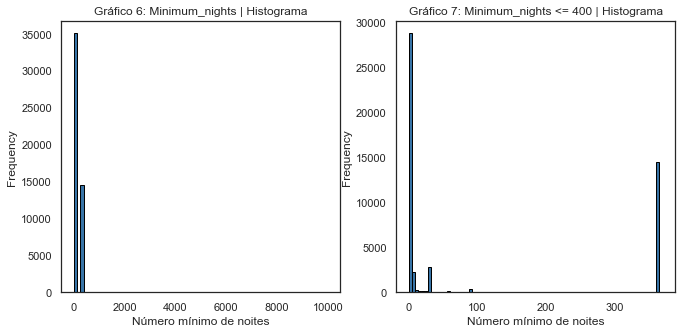

In [60]:
# Histograma da variável minimum_nights

plt.figure(figsize=(11,5))

# Histograma geral da variável minimum_nights
plt.subplot(121)
dados['minimum_nights'].plot(kind='hist',color='#3874a7',edgecolor='black', bins=80, title='Gráfico 6: Minimum_nights | Histograma')
plt.xlabel('Número mínimo de noites')

# Histograma limitado à variável minimum_nights <=40

plt.subplot(122)
dados['minimum_nights'][(df.minimum_nights > 0) & (df.minimum_nights<400)].plot(kind ='hist', color='#3874a7', edgecolor='black', bins=80, title='Gráfico 7: Minimum_nights <= 400 | Histograma')
plt.xlabel('Número mínimo de noites');

In [22]:
# Medidas estatísticas para a variável minimum_nights

dados.minimum_nights.describe().round(2)

count    49634.00
mean       111.96
std        169.90
min          1.00
25%          2.00
50%          4.00
75%        365.00
max       9999.00
Name: minimum_nights, dtype: float64

In [23]:
# Medidas estatísticas: 

# Moda
print(f'Moda: {dados.minimum_nights.mode()[0]}')

#Variância
print(f'Variância: {dados.minimum_nights.var():.2f}')

# Percentil 99%
print(f'Percentil 99%: {np.percentile(dados.minimum_nights, 99).round(2)}')

Moda: 365
Variância: 28865.55
Percentil 99%: 365.0


Conclusões e resumo da análise estatística realizada acima, para a variável ``minimum_nights``:
 - Média: 111.96 noites
 - Mediana: 4 noites
 - Moda: 365 noites
 
 - 25% dos imóveis disponíveis pedem 1 a  2 noites de reserva
 - 50% dos imóveis disponíveis pedem de 1 a 4 noites de reserva
 - 75% dos imóveis disponíveis pedem de 1 a 365 noites de reserva
 
 - 99% das reservas realizadas no Airbnb em Paris variam de 1 a 365 noites de reserva, mostrando que apenas 1% dos anfitriões pedem um mínimo de noites de reserva superior a 365 dias. 

In [90]:
# Verificando a quantidade de imóveis com um mínimo noites de reserva de 365 noites.

print(f'A quantidade de imóveis que exigem 365 noites de reservas é {dados[dados.minimum_nights==365].shape[0]}, como pode ser visto na tabela abaixo')
dados[dados['minimum_nights']==365]


A quantidade de imóveis que exigem 365 noites de reservas é 14490, como pode ser visto na tabela abaixo


,neighbourhood,latitude,longitude,room_type,price,minimum_nights,price_group,mnights_group
14,Buttes-Montmartre,48.883150,2.341580,Entire home/apt,90,365,"(-11.6, 232.0]","(200.96, 400.92]"
19,Entrepôt,48.873420,2.362390,Entire home/apt,150,365,"(-11.6, 232.0]","(200.96, 400.92]"
28,Bourse,48.865240,2.348070,Entire home/apt,64,365,"(-11.6, 232.0]","(200.96, 400.92]"
51,Popincourt,48.856720,2.377710,Entire home/apt,139,365,"(-11.6, 232.0]","(200.96, 400.92]"
55,Popincourt,48.869300,2.371630,Entire home/apt,79,365,"(-11.6, 232.0]","(200.96, 400.92]"
...,...,...,...,...,...,...,...,...
47839,Opéra,48.881490,2.332960,Entire home/apt,163,365,"(-11.6, 232.0]","(200.96, 400.92]"
47954,Buttes-Montmartre,48.884950,2.339490,Entire home/apt,249,365,"(232.0, 464.0]","(200.96, 400.92]"
47965,Gobelins,48.832030,2.354220,Entire home/apt,264,365,"(232.0, 464.0]","(200.96, 400.92]"
48036,Buttes-Montmartre,48.886189,2.356887,Entire home/apt,59,365,"(-11.6, 232.0]","(200.96, 400.92]"


Percebe-se que esta quantidade de imóveis que exigem um mínimo de 365 noites de aluguel (14490) faz com que a média do mínimo de noites suba consideravelmente, alcançando as 111.96 noites, como analisado anteriormente.

In [25]:
# Medidas estatísicas para a variável minimum_nights <= 200

dados[dados.minimum_nights<200]['minimum_nights'].describe().round(2)

count    35084.00
mean         6.63
std         13.93
min          1.00
25%          1.00
50%          2.00
75%          4.00
max        199.00
Name: minimum_nights, dtype: float64

In [26]:
# Moda para minimum_nights <= 200

dados[dados.minimum_nights<200]['minimum_nights'].mode()[0]

1

Ao análisar a faixa com maior incidência, de imóveis que pedem no mínimo de 1 a 200 noites de aluguel, pode-se notar que a média é de 6 a 7 noites. 75% dos imóveis tem um mínimo de noites exigidas para realizar a reserva de 1 a 4 noites.

In [27]:
# Dados contendo um número mínimo de noites para reservar superior a 365 noites

dados[dados.minimum_nights>365]

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,price_group,mnights_group
494,Temple,48.86553,2.36078,Entire home/apt,85,500,"(-11.6, 232.0]","(400.92, 600.88]"
1439,Popincourt,48.85161,2.39030,Entire home/apt,90,1001,"(-11.6, 232.0]","(1000.8, 1200.76]"
1814,Batignolles-Monceau,48.89333,2.31849,Private room,80,1000,"(-11.6, 232.0]","(800.84, 1000.8]"
1817,Popincourt,48.86685,2.36918,Private room,56,400,"(-11.6, 232.0]","(200.96, 400.92]"
2707,Reuilly,48.84523,2.40740,Entire home/apt,90,1000,"(-11.6, 232.0]","(800.84, 1000.8]"
2710,Popincourt,48.86863,2.37017,Private room,100,400,"(-11.6, 232.0]","(200.96, 400.92]"
3708,Buttes-Montmartre,48.89033,2.32794,Entire home/apt,80,370,"(-11.6, 232.0]","(200.96, 400.92]"
5519,Gobelins,48.82236,2.34414,Entire home/apt,300,1112,"(232.0, 464.0]","(1000.8, 1200.76]"
9134,Reuilly,48.84924,2.37550,Private room,50,9999,"(-11.6, 232.0]","(9799.04, 9999.0]"
9462,Observatoire,48.82655,2.33887,Entire home/apt,65,1124,"(-11.6, 232.0]","(1000.8, 1200.76]"


In [28]:
# Número de dados com mínimo de noites de reserva superior a 365 noites

dados[dados.minimum_nights>365].shape[0]

22

In [29]:
# Percentual de imóveis com mínimo de noites para reservar superior a 365 noites

(dados[dados.minimum_nights>365]['minimum_nights'].count()/dados.shape[0]*100).round(2)

0.04

Ao analisar os dados para um mínimo de noites exigidas para realizar uma reserva superior a 365, pode-se notar que aparecem apenas 22 dados, o que representa apenas 0.04% de todos os dados do dataset.

Vale ressaltar ainda que o objetivo deste projeto não é avaliar outliers, porém ao analisar o valor máximo obtido da variável ``minimum_nights``, percebe-se que o valor foi 9999. Este valor se afasta bastante dos outros valores obtidos no dataset da variável, o que necessitaria de uma análise mais a fundo.

### 4. Relacionamento entre as variáveis

####   Variáveis analisadas: Price x Room Type

In [30]:
# Preço médio de cada tipo de acomodação

price_type = dados.groupby('room_type')['price'].mean().round(2)
price_type

room_type
Entire home/apt    131.74
Hotel room         260.51
Private room       103.30
Shared room         52.67
Name: price, dtype: float64

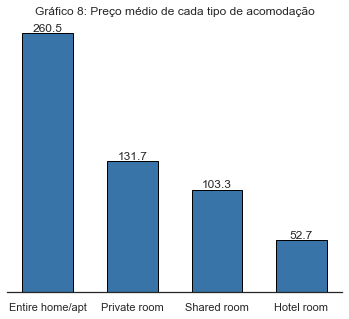

In [56]:
y = dados.groupby('room_type')['price'].mean().round(1).sort_values(ascending=False)
x = dados['room_type'].unique()

fig,ax = plt.subplots(figsize=(6,5))
bars = ax.bar(x, y, 0.6, color='#3874a7', edgecolor='black')
sns.set(style='white')

for bar in bars:
    height = bar.get_height()
    label_x_pos = bar.get_x() + bar.get_width() / 2
    ax.text(label_x_pos, height, s=f'{height}', ha='center', va='bottom')

plt.title('Gráfico 8: Preço médio de cada tipo de acomodação')
plt.yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False);

Pelo gráfico 8, percebe-se que os preços médios de reserva para os tipos de acomodação ``Entire home/apt``, ``Private room``, ``Shared room`` e ``Hotel room`` são, respectivamente, 260.5, 131.7, 103.3 e 52.7 euros.

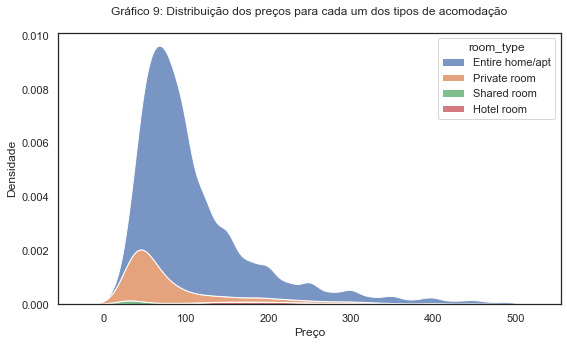

In [61]:
# Gráfico de densidade da relação Price x Room Type

plt.figure(figsize=(9,5))
sns.set(style='white')
fig=sns.kdeplot(data=dados[dados.price < 500], x='price', hue='room_type', multiple='stack')
plt.title('Gráfico 9: Distribuição dos preços para cada um dos tipos de acomodação\n')
plt.xlabel('Preço')
plt.ylabel('Densidade');

O gráfico 9 exibe a distribuição dos preços pelo tipo de acomodação.

#### Variáveis analisadas: Price x Neighbourhood

#####       - Top 10 bairros mais caros para realizar uma reserva no Airbnb em Paris:

In [33]:
# Média de preço da estadia de cada bairro

price_nbhd = dados.groupby('neighbourhood')['price'].mean().round(2).sort_values(ascending=False)
price_nbhd.head(10)

neighbourhood
Élysée            255.04
Louvre            194.54
Palais-Bourbon    188.96
Passy             186.46
Luxembourg        185.86
Bourse            171.83
Hôtel-de-Ville    170.19
Temple            164.21
Opéra             153.21
Panthéon          142.44
Name: price, dtype: float64

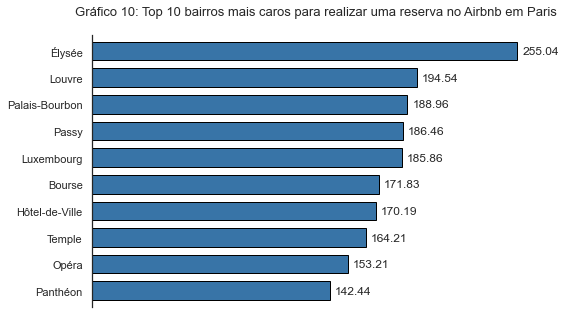

In [91]:
# Gráfico com a média de preços dos dez bairros mais caros para realizar uma reserva no Airbnb em Paris

plt.figure(figsize=(8,5))

ax = price_nbhd.head(10).sort_values(ascending=True).plot(kind='barh', width=0.7, color='#3874a7', edgecolor='black')

for p in ax.patches:
                _x = p.get_width() + float (3)
                _y = p.get_y() + p.get_height()/2
                value = float(p.get_width())
                ax.text(_x, _y, value, va='center')
                
plt.title('Gráfico 10: Top 10 bairros mais caros para realizar uma reserva no Airbnb em Paris\n', fontsize=13)
plt.xticks([])
plt.ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False);

Pelo gráfico e pela tabela, é possível notar que os três bairros com maior média de preço para locação no Airbnb em Paris são:
 - 1º Élysée - 255.04 euros
 - 2º Louvre - 194.54 euros
 - 3º Palais-Bourbon - 188.96 euros

#####       - Top 10 bairros mais baratos para realizar uma reserva no Airbnb em Paris:

In [35]:
price_nbhd.tail(10).sort_values(ascending=True)

neighbourhood
Ménilmontant            78.58
Buttes-Chaumont         82.13
Gobelins                88.90
Buttes-Montmartre       93.84
Reuilly                 94.44
Popincourt             102.07
Entrepôt               113.34
Observatoire           117.17
Vaugirard              118.39
Batignolles-Monceau    127.94
Name: price, dtype: float64

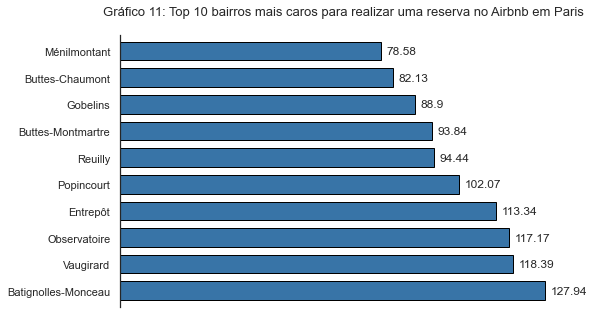

In [92]:
# Gráfico com a média de preços dos dez bairros mais baratos para realizar uma reserva no Airbnb em Paris

plt.figure(figsize=(8,5))

ax = price_nbhd.tail(10).sort_values(ascending=False).plot(kind='barh', width=0.7, color='#3874a7', edgecolor='black')

for p in ax.patches:
                _x = p.get_width() + float (1.7)
                _y = p.get_y() + p.get_height()/2
                value = float(p.get_width())
                ax.text(_x, _y, value, va='center')
                
plt.title('Gráfico 11: Top 10 bairros mais caros para realizar uma reserva no Airbnb em Paris\n', fontsize=13)
plt.xticks([])
plt.ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False);

Pelo gráfico e pela tabela, é possível notar que os três bairros com menor média de preço para locação no Airbnb em Paris são:
 - 1º Ménilmontant - 78.58 euros
 - 2º Buttes-Chaumont - 82.13 euros
 - 3º Gobelins - 88.90 euros

### 5. Análise Geográfica

A partir das coordenadas de latitude e longitude disponíveis no dataset, serão explorados o comportamento das váriaveis ``neighbourhood``, ``room_type`` e ``price``, para um valor de preço menor que 100 euros.

#### Variável Analisada: Neighbourhood

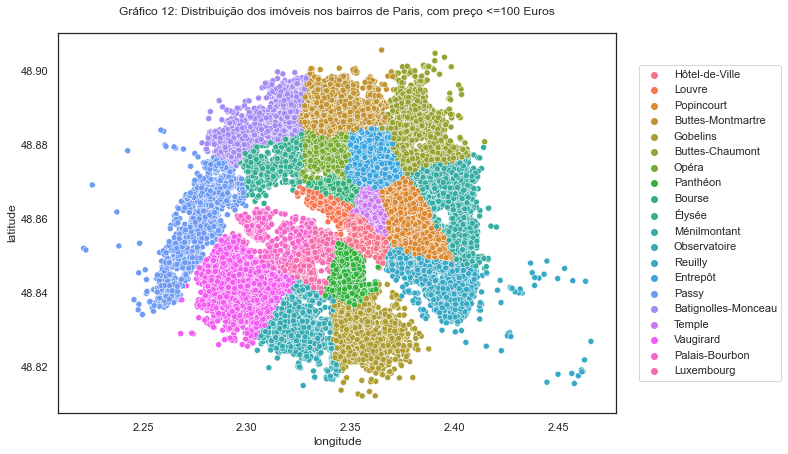

In [93]:
# Gráfico scatterplot da variável Neighbourhood

plt.figure(figsize=(10,7))
sns.scatterplot(data=dados[dados.price <= 100], x='longitude', y='latitude', hue='neighbourhood')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.title('Gráfico 12: Distribuição dos imóveis nos bairros de Paris, com preço <=100 Euros\n')
plt.savefig('geo_price.png');

O gráfico 12 mostra a distribuição dos imóveis nos bairros de Paris.

#### Variável Analisada: Room_type

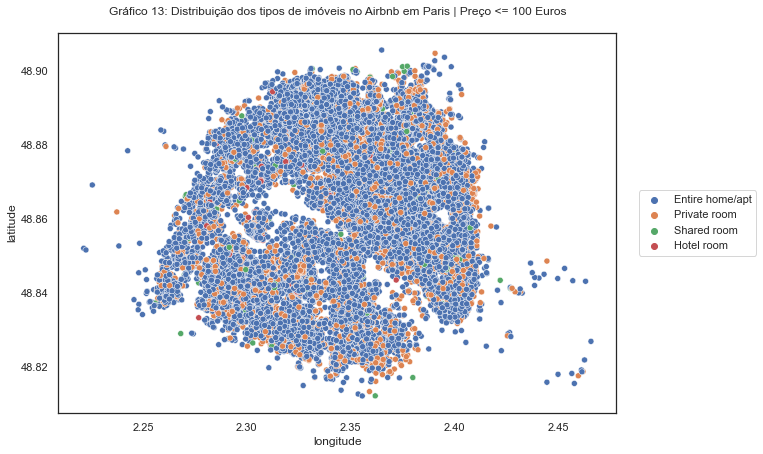

In [94]:
# Gráfico scatterplot da variável Room_type

plt.figure(figsize=(10,7))
sns.scatterplot(data=dados[dados.price <= 100], x='longitude', y='latitude', hue='room_type')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.title('Gráfico 13: Distribuição dos tipos de imóveis no Airbnb em Paris | Preço <= 100 Euros\n')
plt.savefig('geo_price.png');

O gráfico 13 mostra como os tipos de acomodação estão distribuídos pela cidade de Paris. 

#### Variável Analisada: Price

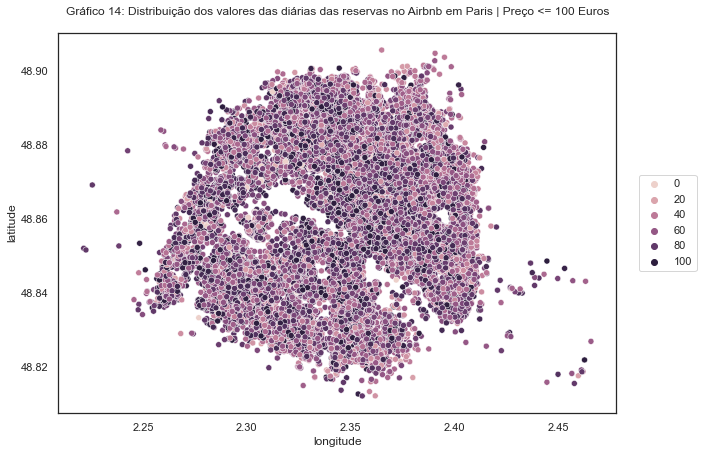

In [95]:
# Gráfico scatterplot da variável Price

plt.figure(figsize=(10,7))
sns.scatterplot(data=dados[dados.price <= 100], x='longitude', y='latitude', hue='price')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.title('Gráfico 14: Distribuição dos valores das diárias das reservas no Airbnb em Paris | Preço <= 100 Euros\n')
plt.savefig('geo_price.png');

O gráfico 14 mostra a distribuição do preço dos imóveis com aluguel menor que 100 euros.